# Instant Gratification

## Your first Frontier LLM Project!

Let's build a useful LLM solution - in a matter of minutes.

By the end of this course, you will have built an autonomous Agentic AI solution with 7 agents that collaborate to solve a business problem. All in good time! We will start with something smaller...

Our goal is to code a new kind of Web Browser. Give it a URL, and it will respond with a summary. The Reader's Digest of the internet!!

Before starting, you should have completed the setup for [PC](../SETUP-PC.md) or [Mac](../SETUP-mac.md) and you hopefully launched this jupyter lab from within the project root directory, with your environment activated.

## If you're new to Jupyter Lab

Welcome to the wonderful world of Data Science experimentation! Once you've used Jupyter Lab, you'll wonder how you ever lived without it. Simply click in each "cell" with code in it, such as the cell immediately below this text, and hit Shift+Return to execute that cell. As you wish, you can add a cell with the + button in the toolbar, and print values of variables, or try out variations.  

I've written a notebook called [Guide to Jupyter](Guide%20to%20Jupyter.ipynb) to help you get more familiar with Jupyter Labs, including adding Markdown comments, using `!` to run shell commands, and `tqdm` to show progress.

If you prefer to work in IDEs like VSCode or Pycharm, they both work great with these lab notebooks too.  

## If you'd like to brush up your Python

I've added a notebook called [Intermediate Python](Intermediate%20Python.ipynb) to get you up to speed. But you should give it a miss if you already have a good idea what this code does:    
`yield from {book.get("author") for book in books if book.get("author")}`

## I am here to help

If you have any problems at all, please do reach out.  
I'm available through the platform, or at ed@edwarddonner.com, or at https://www.linkedin.com/in/eddonner/ if you'd like to connect (and I love connecting!)

## More troubleshooting

Please see the [troubleshooting](troubleshooting.ipynb) notebook in this folder to diagnose and fix common problems. At the very end of it is a diagnostics script with some useful debug info.

## If this is old hat!

If you're already comfortable with today's material, please hang in there; you can move swiftly through the first few labs - we will get much more in depth as the weeks progress.

<table style="margin: 0; text-align: left;">
    <tr>
        <td style="width: 150px; height: 150px; vertical-align: middle;">
            <img src="../important.jpg" width="150" height="150" style="display: block;" />
        </td>
        <td>
            <h2 style="color:#900;">Please read - important note</h2>
            <span style="color:#900;">The way I collaborate with you may be different to other courses you've taken. I prefer not to type code while you watch. Rather, I execute Jupyter Labs, like this, and give you an intuition for what's going on. My suggestion is that you do this with me, either at the same time, or (perhaps better) right afterwards. Add print statements to understand what's going on, and then come up with your own variations. If you have a Github account, use this to showcase your variations. Not only is this essential practice, but it demonstrates your skills to others, including perhaps future clients or employers...</span>
        </td>
    </tr>
</table>
<table style="margin: 0; text-align: left;">
    <tr>
        <td style="width: 150px; height: 150px; vertical-align: middle;">
            <img src="../business.jpg" width="150" height="150" style="display: block;" />
        </td>
        <td>
            <h2 style="color:#181;">Business value of these exercises</h2>
            <span style="color:#181;">A final thought. While I've designed these notebooks to be educational, I've also tried to make them enjoyable. We'll do fun things like have LLMs tell jokes and argue with each other. But fundamentally, my goal is to teach skills you can apply in business. I'll explain business implications as we go, and it's worth keeping this in mind: as you build experience with models and techniques, think of ways you could put this into action at work today. Please do contact me if you'd like to discuss more or if you have ideas to bounce off me.</span>
        </td>
    </tr>
</table>

In [29]:
# imports

import os
import requests
from dotenv import load_dotenv
from bs4 import BeautifulSoup
from IPython.display import Markdown, display, Image
from openai import OpenAI
import matplotlib.pyplot as plt
from PIL import Image as I
# If you get an error running this cell, then please head over to the troubleshooting notebook!

# Connecting to OpenAI

The next cell is where we load in the environment variables in your `.env` file and connect to OpenAI.

## Troubleshooting if you have problems:

Head over to the [troubleshooting](troubleshooting.ipynb) notebook in this folder for step by step code to identify the root cause and fix it!

If you make a change, try restarting the "Kernel" (the python process sitting behind this notebook) by Kernel menu >> Restart Kernel and Clear Outputs of All Cells. Then try this notebook again, starting at the top.

Or, contact me! Message me or email ed@edwarddonner.com and we will get this to work.

Any concerns about API costs? See my notes in the README - costs should be minimal, and you can control it at every point. You can also use Ollama as a free alternative, which we discuss during Day 2.

In [2]:
# Load environment variables in a file called .env

load_dotenv()
api_key = os.getenv('OPENAI_API_KEY')

# Check the key

if not api_key:
    print("No API key was found - please head over to the troubleshooting notebook in this folder to identify & fix!")
elif not api_key.startswith("sk-proj-"):
    print("An API key was found, but it doesn't start sk-proj-; please check you're using the right key - see troubleshooting notebook")
elif api_key.strip() != api_key:
    print("An API key was found, but it looks like it might have space or tab characters at the start or end - please remove them - see troubleshooting notebook")
else:
    print("API key found and looks good so far!")


API key found and looks good so far!


In [3]:
openai = OpenAI()

# If this doesn't work, try Kernel menu >> Restart Kernel and Clear Outputs Of All Cells, then run the cells from the top of this notebook down.
# If it STILL doesn't work (horrors!) then please see the troubleshooting notebook, or try the below line instead:
# openai = OpenAI(api_key="your-key-here-starting-sk-proj-")

# Let's make a quick call to a Frontier model to get started, as a preview!

In [4]:
# To give you a preview -- calling OpenAI with these messages is this easy:

message = "Hello, GPT! This is my first ever message to you! Hi!"
response = openai.chat.completions.create(model="gpt-4o-mini", messages=[{"role":"user", "content":message}])
print(response.choices[0].message.content)

Hello! It's great to hear from you! Welcome! How can I assist you today?


## OK onwards with our first project

In [5]:
# A class to represent a Webpage
# If you're not familiar with Classes, check out the "Intermediate Python" notebook

# Some websites need you to use proper headers when fetching them:
headers = {
 "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36"
}

class Website:

    def __init__(self, url):
        """
        Create this Website object from the given url using the BeautifulSoup library
        """
        self.url = url
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.content, 'html.parser')
        self.title = soup.title.string if soup.title else "No title found"
        for irrelevant in soup.body(["script", "style", "img", "input"]):
            irrelevant.decompose()
        self.text = soup.body.get_text(separator="\n", strip=True)

In [6]:
# Let's try one out. Change the website and add print statements to follow along.

ed = Website("https://edwarddonner.com")
print(ed.title)
print(ed.text)

Home - Edward Donner
Home
Outsmart
An arena that pits LLMs against each other in a battle of diplomacy and deviousness
About
Posts
Well, hi there.
I’m Ed. I like writing code and experimenting with LLMs, and hopefully you’re here because you do too. I also enjoy DJing (but I’m badly out of practice), amateur electronic music production (
very
amateur) and losing myself in
Hacker News
, nodding my head sagely to things I only half understand.
I’m the co-founder and CTO of
Nebula.io
. We’re applying AI to a field where it can make a massive, positive impact: helping people discover their potential and pursue their reason for being. Recruiters use our product today to source, understand, engage and manage talent. I’m previously the founder and CEO of AI startup untapt,
acquired in 2021
.
We work with groundbreaking, proprietary LLMs verticalized for talent, we’ve
patented
our matching model, and our award-winning platform has happy customers and tons of press coverage.
Connect
with me for

## Types of prompts

You may know this already - but if not, you will get very familiar with it!

Models like GPT4o have been trained to receive instructions in a particular way.

They expect to receive:

**A system prompt** that tells them what task they are performing and what tone they should use

**A user prompt** -- the conversation starter that they should reply to

In [7]:
# Define our system prompt - you can experiment with this later, changing the last sentence to 'Respond in markdown in Spanish."

system_prompt = "You are an assistant that analyzes the contents of a website \
and provides a short summary, ignoring text that might be navigation related. \
Respond in markdown."

In [8]:
# A function that writes a User Prompt that asks for summaries of websites:

def user_prompt_for(website):
    user_prompt = f"You are looking at a website titled {website.title}"
    user_prompt += "\nThe contents of this website is as follows; \
please provide a short summary of this website in markdown. \
If it includes news or announcements, then summarize these too.\n\n"
    user_prompt += website.text
    return user_prompt

In [9]:
type(ed)

__main__.Website

In [10]:
print(user_prompt_for(ed))

You are looking at a website titled Home - Edward Donner
The contents of this website is as follows; please provide a short summary of this website in markdown. If it includes news or announcements, then summarize these too.

Home
Outsmart
An arena that pits LLMs against each other in a battle of diplomacy and deviousness
About
Posts
Well, hi there.
I’m Ed. I like writing code and experimenting with LLMs, and hopefully you’re here because you do too. I also enjoy DJing (but I’m badly out of practice), amateur electronic music production (
very
amateur) and losing myself in
Hacker News
, nodding my head sagely to things I only half understand.
I’m the co-founder and CTO of
Nebula.io
. We’re applying AI to a field where it can make a massive, positive impact: helping people discover their potential and pursue their reason for being. Recruiters use our product today to source, understand, engage and manage talent. I’m previously the founder and CEO of AI startup untapt,
acquired in 2021
.

In [11]:
system_prompt

'You are an assistant that analyzes the contents of a website and provides a short summary, ignoring text that might be navigation related. Respond in markdown.'

## Messages

The API from OpenAI expects to receive messages in a particular structure.
Many of the other APIs share this structure:

```
[
    {"role": "system", "content": "system message goes here"},
    {"role": "user", "content": "user message goes here"}
]

To give you a preview, the next 2 cells make a rather simple call - we won't stretch the might GPT (yet!)

In [12]:
# Open AI expects the messages in a specific format, so we need to convert our prompts to that format. These are a list of dictionaries, each with a role and content key.
messages = [
    {"role": "system", "content": "You are a snarky assistant"},
    {"role": "user", "content": "What is 2 + 2?"}
]

In [13]:
# To give you a preview -- calling OpenAI with system and user messages:

response = openai.chat.completions.create(model="gpt-4o-mini", messages=messages)
print(response.choices[0].message.content)

Oh, you’re really challenging me with that one! The answer is 4. Shocking, I know!


## And now let's build useful messages for GPT-4o-mini, using a function

In [14]:
# See how this function creates exactly the format above

def messages_for(website):
    return [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_prompt_for(website)}
    ]

In [15]:
# Try this out, and then try for a few more websites

messages_for(ed)

[{'role': 'system',
  'content': 'You are an assistant that analyzes the contents of a website and provides a short summary, ignoring text that might be navigation related. Respond in markdown.'},
 {'role': 'user',
  'content': 'You are looking at a website titled Home - Edward Donner\nThe contents of this website is as follows; please provide a short summary of this website in markdown. If it includes news or announcements, then summarize these too.\n\nHome\nOutsmart\nAn arena that pits LLMs against each other in a battle of diplomacy and deviousness\nAbout\nPosts\nWell, hi there.\nI’m Ed. I like writing code and experimenting with LLMs, and hopefully you’re here because you do too. I also enjoy DJing (but I’m badly out of practice), amateur electronic music production (\nvery\namateur) and losing myself in\nHacker News\n, nodding my head sagely to things I only half understand.\nI’m the co-founder and CTO of\nNebula.io\n. We’re applying AI to a field where it can make a massive, posi

## Time to bring it together - the API for OpenAI is very simple!

In [16]:
# And now: call the OpenAI API. You will get very familiar with this!

def summarize(url):
    website = Website(url)
    response = openai.chat.completions.create(
        model = "gpt-4o-mini",
        messages = messages_for(website)
    )
    return response.choices[0].message.content

In [17]:
summarize("https://edwarddonner.com")

"# Summary of Edward Donner's Website\n\nEdward Donner's website serves as a personal platform where he shares his passion for coding and experimenting with large language models (LLMs). As the co-founder and CTO of Nebula.io, he focuses on utilizing AI to enhance talent discovery and management.\n\n## Key Highlights:\n- **About Ed**: Ed is a tech enthusiast with a background in AI, previously the founder and CEO of untapt, an AI startup acquired in 2021. He enjoys DJing, amateur music production, and staying informed through Hacker News.\n- **Nebula.io**: The company leverages proprietary LLMs to improve recruitment processes, backed by a patented matching model and positive customer feedback.\n\n## Recent Announcements:\n- **December 21, 2024**: Welcoming visitors to the site, likely targeting data scientists.\n- **November 13, 2024**: Sharing resources for mastering AI and LLM engineering.\n- **October 16, 2024**: Offering resources for transitioning from software engineering to AI 

In [18]:
# A function to display this nicely in the Jupyter output, using markdown

def display_summary(url):
    summary = summarize(url)
    display(Markdown(summary))

In [19]:
display_summary("https://edwarddonner.com")

# Summary of Edward Donner's Website

Edward Donner's website primarily showcases his interests and professional background in AI and Large Language Models (LLMs). He is a co-founder and CTO of Nebula.io, a platform focused on using AI to help individuals discover their potential in the job market. The site reflects his enthusiasm for coding, LLM experimentation, and electronic music, along with a sense of humor regarding his DJ skills.

## Recent Posts
- **December 21, 2024**: Welcome, SuperDataScientists!
- **November 13, 2024**: Mastering AI and LLM Engineering – Resources
- **October 16, 2024**: From Software Engineer to AI Data Scientist – Resources
- **August 6, 2024**: Introduction to the Outsmart LLM Arena, emphasizing competition among LLMs in a strategic context. 

He encourages visitors to connect with him and learn more about his work and interests.

# Let's try more websites

Note that this will only work on websites that can be scraped using this simplistic approach.

Websites that are rendered with Javascript, like React apps, won't show up. See the community-contributions folder for a Selenium implementation that gets around this. You'll need to read up on installing Selenium (ask ChatGPT!)

Also Websites protected with CloudFront (and similar) may give 403 errors - many thanks Andy J for pointing this out.

But many websites will work just fine!

In [20]:
display_summary("https://cnn.com")

# Summary of CNN Website

CNN provides comprehensive coverage of various news categories including US news, world events, politics, business, health, entertainment, sports, science, and climate. The website features up-to-date articles, video content, and live broadcasts. Key highlights and recent stories include:

### Key News Highlights:
- **Puerto Rico Power Outage**: Over 70% of customers remain without power after a significant outage.
- **Norovirus Surge**: Health experts discuss rising cases and symptoms.
- **Violence in Gaza**: Displaced Palestinians are struggling as winter approaches.
- **Trump's Endorsement**: Speaker Johnson reacts to Donald Trump’s public support ahead of a critical House vote.
- **Supreme Court Warnings**: Chief Justice Roberts cautions against ignoring court rulings amid tensions with ex-President Trump.

### Politics:
- Congressional dynamics are tense as House Republicans edge closer to a pivotal vote influenced by party affiliations.

### Health and Science:
- Experts are raising alarms about rising COVID-19 levels in the US.
- New findings report concerning trends in animal species and environmental influences on health.

### Entertainment:
- In pop culture, Brad Pitt and Angelina Jolie have finalized their divorce, and new traditions for welcoming the new year are discussed.

CNN continues to be a leading source for breaking news and analysis on a wide array of topics, serving its audience with timely updates and in-depth reports.

In [21]:
display_summary("https://anthropic.com")

# Anthropic Website Summary

Anthropic is an AI safety and research company based in San Francisco, focusing on creating reliable and beneficial AI systems. The company operates under the philosophy of prioritizing safety in AI development.

## Key Offerings
- **Claude AI Models**: 
  - **Claude 3.5 Sonnet**: The latest AI model available for use.
  - **Claude 3.5 Haiku**: Another release mentioned.
  - **Custom Applications**: Users can build AI-powered applications using Anthropic's API.

## Recent Announcements
- **New AI Models**: On October 22, 2024, Anthropic announced the introduction of computer use, including Claude 3.5 Sonnet and Claude 3.5 Haiku.
- **Enterprise Solutions**: As of September 4, 2024, Claude for Enterprise is available, targeting business applications.

## Research Outputs
- **Constitutional AI**: Released on December 15, 2022, focuses on harmlessness derived from AI feedback.
- **Core Views on AI Safety**: Discussed on March 8, 2023, detailing the company's perspectives on AI safety.

The website features sections for team information, pricing, career opportunities, and provides avenues for customer support and press inquiries.

<table style="margin: 0; text-align: left;">
    <tr>
        <td style="width: 150px; height: 150px; vertical-align: middle;">
            <img src="../business.jpg" width="150" height="150" style="display: block;" />
        </td>
        <td>
            <h2 style="color:#181;">Business applications</h2>
            <span style="color:#181;">In this exercise, you experienced calling the Cloud API of a Frontier Model (a leading model at the frontier of AI) for the first time. We will be using APIs like OpenAI at many stages in the course, in addition to building our own LLMs.

More specifically, we've applied this to Summarization - a classic Gen AI use case to make a summary. This can be applied to any business vertical - summarizing the news, summarizing financial performance, summarizing a resume in a cover letter - the applications are limitless. Consider how you could apply Summarization in your business, and try prototyping a solution.</span>
        </td>
    </tr>
</table>

<table style="margin: 0; text-align: left;">
    <tr>
        <td style="width: 150px; height: 150px; vertical-align: middle;">
            <img src="../important.jpg" width="150" height="150" style="display: block;" />
        </td>
        <td>
            <h2 style="color:#900;">Before you continue - now try yourself</h2>
            <span style="color:#900;">Use the cell below to make your own simple commercial example. Stick with the summarization use case for now. Here's an idea: write something that will take the contents of an email, and will suggest an appropriate short subject line for the email. That's the kind of feature that might be built into a commercial email tool.</span>
        </td>
    </tr>
</table>

In [ ]:
# Step 1: Create your prompts

system_prompt = "something here"
user_prompt = """
    Lots of text
    Can be pasted here
"""

# Step 2: Make the messages list

messages = [] # fill this in

# Step 3: Call OpenAI

response =

# Step 4: print the result

print(

## An extra exercise for those who enjoy web scraping

You may notice that if you try `display_summary("https://openai.com")` - it doesn't work! That's because OpenAI has a fancy website that uses Javascript. There are many ways around this that some of you might be familiar with. For example, Selenium is a hugely popular framework that runs a browser behind the scenes, renders the page, and allows you to query it. If you have experience with Selenium, Playwright or similar, then feel free to improve the Website class to use them. In the community-contributions folder, you'll find an example Selenium solution from a student (thank you!)

# Sharing your code

I'd love it if you share your code afterwards so I can share it with others! You'll notice that some students have already made changes (including a Selenium implementation) which you will find in the community-contributions folder. If you'd like add your changes to that folder, submit a Pull Request with your new versions in that folder and I'll merge your changes.

If you're not an expert with git (and I am not!) then GPT has given some nice instructions on how to submit a Pull Request. It's a bit of an involved process, but once you've done it once it's pretty clear. As a pro-tip: it's best if you clear the outputs of your Jupyter notebooks (Edit >> Clean outputs of all cells, and then Save) for clean notebooks.

PR instructions courtesy of an AI friend: https://chatgpt.com/share/670145d5-e8a8-8012-8f93-39ee4e248b4c

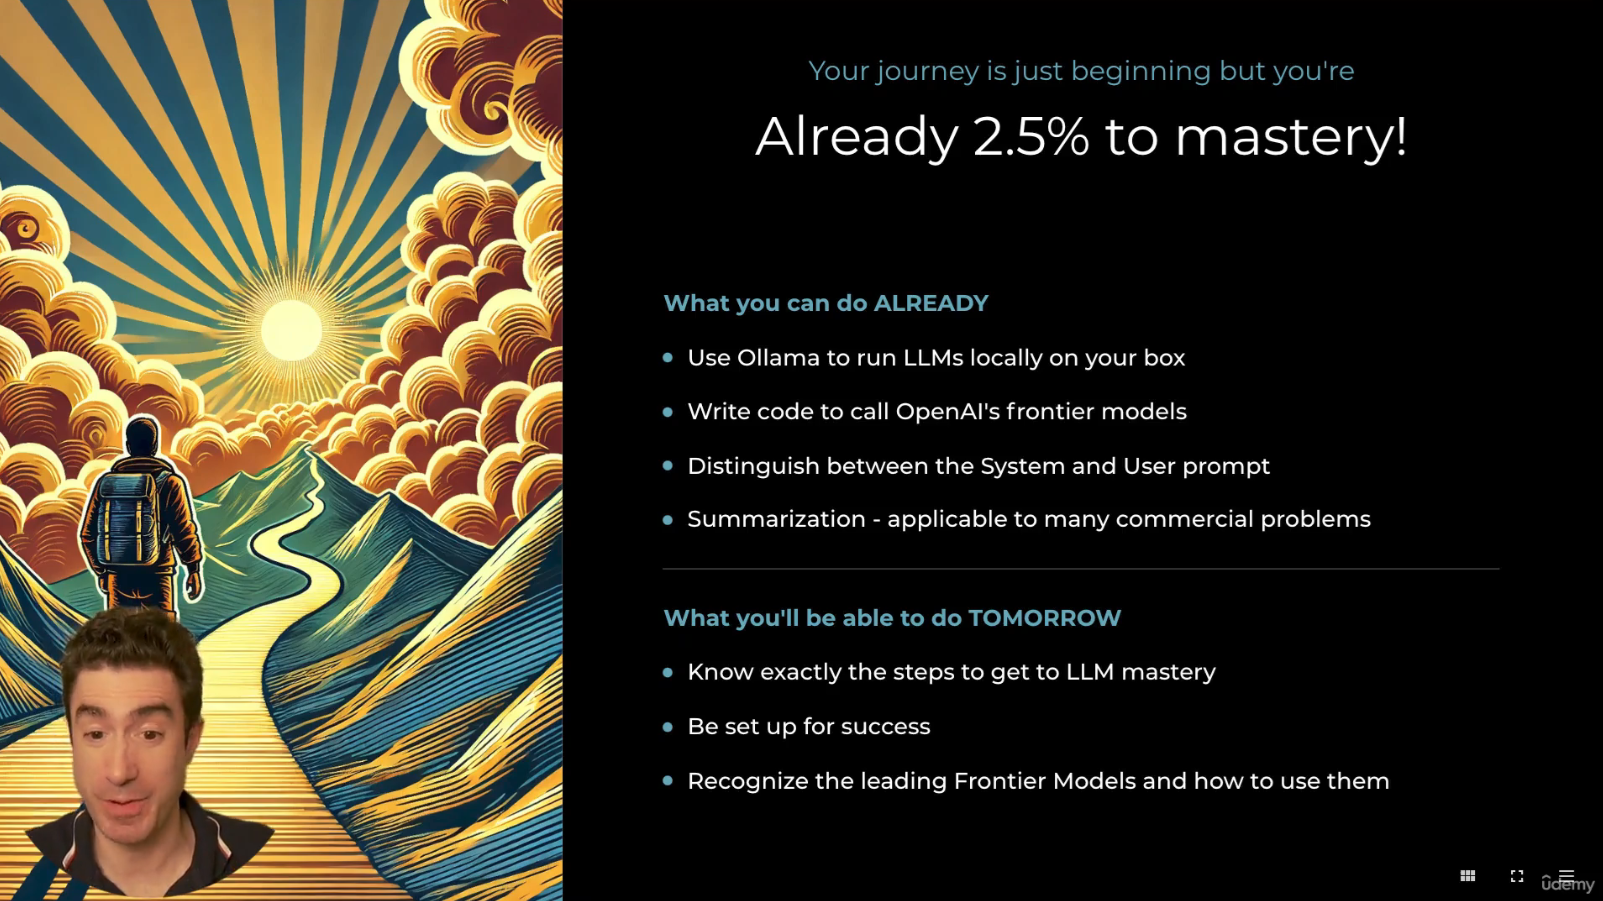

In [26]:
Image("../1. Images/Recap - 1_1.png")

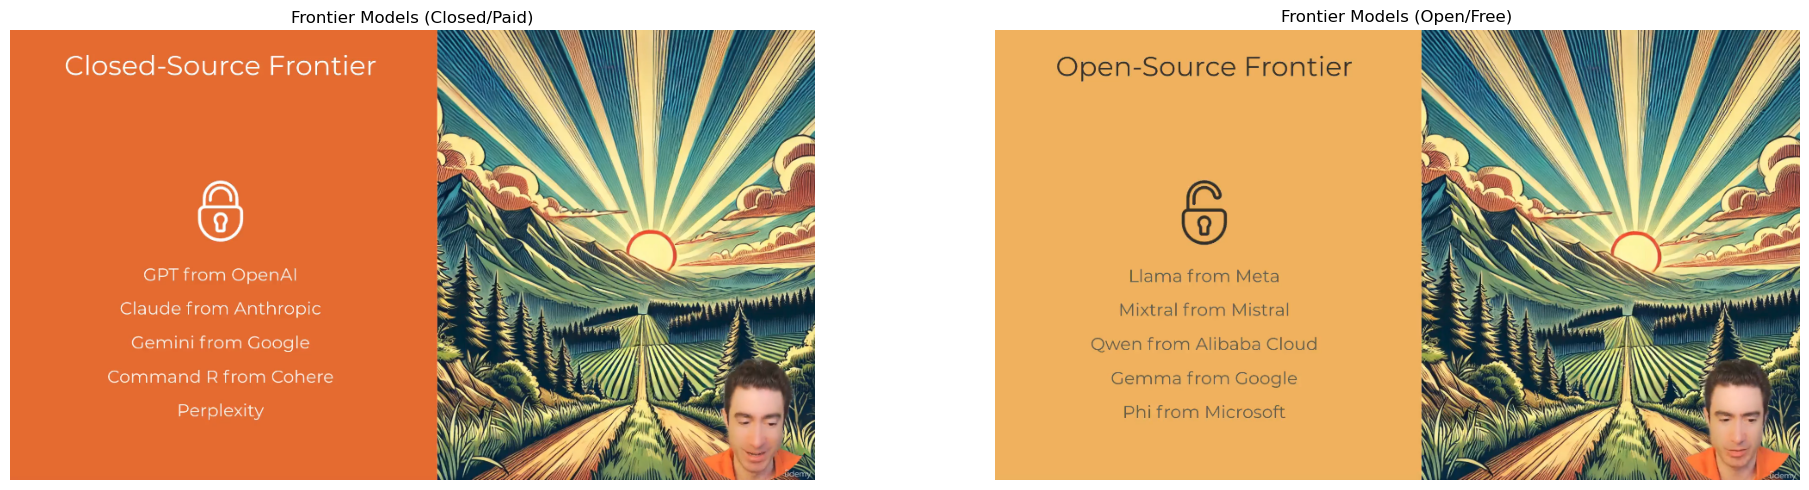

In [31]:
image_paths = ["../1. Images/Day - 2.1.png", "../1. Images/Day - 2.2.png"]
titles = ["Frontier Models (Closed/Paid)", "Frontier Models (Open/Free)"]
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

for ax, path, title in zip(axes.flatten(), image_paths, titles):
    img = I.open(path)
    ax.axis("off")
    ax.set_title(title)
    ax.imshow(img)
    ax.set_title(title)

plt.tight_layout()
plt.show()

There are three ways to access and use models - 

<ul>
    <li><b>Chat interfaces</b>: Like ChatGPT</li>
    <li><b>Cloud APIs</b>: LLM API, Frameworks like LangChain (Libraries), Managed AI Cloud Services (Amazon Bedrock, Google Vertex, Azure ML)</li>
    <li><b>Direct Inference</b>: With the HuggingFace Transformers library, Ollama</li>
</ul>